# GPT-4 Vision

GPT-4 Turbo with Vision is a large multimodal model (LMM) developed by OpenAI that can analyze images and provide textual responses to questions about them. It incorporates both natural language processing and visual understanding.

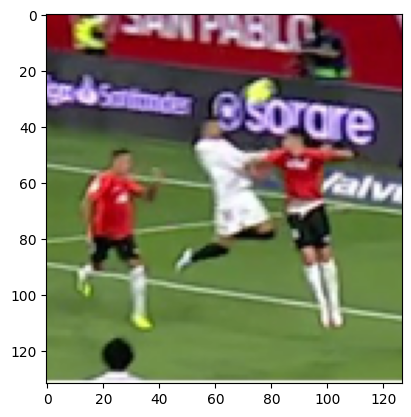

In [1]:
# Show data/football.png image below
from PIL import Image
import matplotlib.pyplot as plt
IMAGE_PATH='data/football.png'
img = Image.open(IMAGE_PATH)
plt.imshow(img)
plt.show()

In [3]:
import os
import requests
import base64
from dotenv import load_dotenv
load_dotenv()

# Configuration
GPT4V_KEY = os.getenv('AZURE_OPENAI_KEY')
encoded_image = base64.b64encode(open(IMAGE_PATH, 'rb').read()).decode('ascii')
headers = {
    "Content-Type": "application/json",
    "api-key": GPT4V_KEY,
}

# Payload for the request
payload = {
  "messages": [
    {
      "role": "system",
      "content": [
        {
          "type": "text",
          "text": "You are an AI assistant that helps people find information."
        }
      ]
    },
    {
      "role": "user",
      "content": [
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/png;base64,{encoded_image}"
          }
        },
        {
          "type": "text",
          "text": "Describe this picture"
        }
      ]
    }
  ],
  "temperature": 0.3,
  "top_p": 0.95,
  "max_tokens": 500
}

GPT4V_ENDPOINT = f"{os.getenv('AZURE_OPENAI_ENDPOINT')}openai/deployments/{os.getenv('AZURE_OPENAI_DEPLOYMENT_NAME_GPT4V')}/chat/completions?api-version={os.getenv('API_VERSION')}"


In [4]:

# Send request
try:
    response = requests.post(GPT4V_ENDPOINT, headers=headers, json=payload)
    response.raise_for_status()  # Will raise an HTTPError if the HTTP request returned an unsuccessful status code
except requests.RequestException as e:
    raise SystemExit(f"Failed to make the request. Error: {e}")

# Handle the response as needed (e.g., print or process)
print(response.json()['choices'][0]['message']['content'])

The image appears to capture a moment from a soccer match. Two players are in the foreground, one wearing a white jersey and the other in a red and black striped jersey. The player in white is executing a high kick, attempting to play the ball which is above his head, while the player in red and black is observing closely, possibly preparing to react to the play. The background shows a stadium with a crowd of spectators and advertising boards, indicating that this is a professional game. The image is a bit blurry, suggesting that it was taken quickly or from a video still.
